In [1]:
import itertools
import gzip

import pandas
import rdkit.Chem
import rdkit.Chem.AllChem
import rdkit.DataStructs

In [3]:
# Read SDF File from Drugbank
supplier = rdkit.Chem.SDMolSupplier('../data/all.sdf')
molecules = [mol for mol in supplier if mol is not None]
len(molecules)

[15:00:48] Warning: conflicting stereochemistry at atom 7 ignored. by rule 1a.
[15:00:48] Warning: conflicting stereochemistry at atom 7 ignored. by rule 1a.
[15:00:48] ERROR: SGroup SAP line too short: 'M  SAP   1  1  13' on line 240658
[15:00:48] ERROR: moving to the beginning of the next molecule
[15:00:48] Warning: conflicting stereochemistry at atom 0 ignored. by rule 1a.
[15:00:48] Warning: conflicting stereochemistry at atom 0 ignored. by rule 1a.
[15:00:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[15:00:49] ERROR: Could not sanitize molecule ending on line 339099
[15:00:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[15:00:49] Explicit valence for atom # 35 O, 3, is greater than permitted
[15:00:49] ERROR: Could not sanitize molecule ending on line 345154
[15:00:49] ERROR: Explicit valence for atom # 35 O, 3, is greater than permitted
[15:00:49] Explicit valence for atom # 17 O, 3, is greater than permitted
[15:00:49] ERROR: Could not s

[15:00:49] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
[15:00:49] ERROR: Could not sanitize molecule ending on line 637879
[15:00:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
[15:00:49] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[15:00:49] ERROR: Could not sanitize molecule ending on line 641495
[15:00:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[15:00:49] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19
[15:00:49] ERROR: Could not sanitize molecule ending on line 643058
[15:00:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19
[15:00:49] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:00:49] ERROR: Could not sanitize molecule ending on line 647103
[15:00:49] ERROR: Explicit valence for atom # 27 N, 4, is greater than permitted
[15:00:49] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
[15:00:49] ERROR: Could not sanitize molecule ending on line 648261
[15

6745

In [10]:
import pickle

with open('../data/all_drugs_did.pickle', 'rb') as f:
    all_drugs_did = pickle.load(f)


In [12]:
# Calculate fingerprints
fingerprints = dict()
for mol in molecules:
    drugbank_id = mol.GetProp('DATABASE_ID')
    if drugbank_id in all_drugs_did: 
        fingerprint = rdkit.Chem.AllChem.GetMorganFingerprint(mol, 2)
        fingerprints[drugbank_id] = fingerprint

In [15]:
len(all_drugs_did)

355

In [16]:
len(fingerprints)

354

In [17]:
# Calculate pairwise compound similarities
similarity_rows = list()
for (id0, fp0), (id1, fp1) in itertools.combinations(fingerprints.items(), 2):
    similarity = rdkit.DataStructs.DiceSimilarity(fp0, fp1)
    similarity = round(similarity, 4)
    similarity_rows.append([id0, id1, similarity])

In [18]:
len(similarity_rows)

62481

In [24]:
similarity_df = pandas.DataFrame(similarity_rows, columns=['compound0', 'compound1', 'similarity'])
# with open('../data/similarity.csv', 'w') as write_file:
#     similarity_df.to_csv(write_file, sep='\t', index=False)
similarity_df.to_csv('../data/similarity.csv')
similarity_df.head()

,compound0,compound1,similarity
0,DB00153,DB00181,0.0678
1,DB00153,DB00184,0.1391
2,DB00153,DB00186,0.0863
3,DB00153,DB00188,0.1266
4,DB00153,DB00191,0.0545


In [9]:
similarity_df.shape

(22744140, 3)

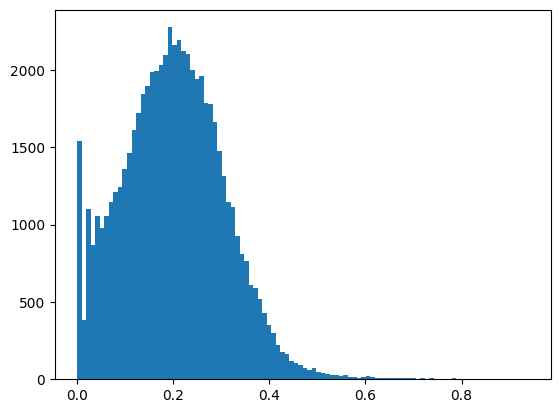

In [22]:
# histogram of similarities
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(similarity_df.similarity, 100);